<a href="https://colab.research.google.com/github/Manjunath727/DLwithTF/blob/master/ITF/W4/l2_ConvNet_with_validation_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2019-07-03 13:40:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.21.128, 2607:f8b0:4002:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.21.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   153MB/s    in 0.9s    

2019-07-03 13:40:05 (153 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2019-07-03 13:40:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.215.128, 2607:f8b0:4002:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2019-07-03 13:40:07 (95.2 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [0]:
# Python code to access the zip file and unzip the contents
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

The contents of the .zip are extracted to the base directory /tmp/horse-or-human, which in turn each contain horses and humans subdirectories.

In short: The training set is the data that is used to tell the neural network model that 'this is what a horse looks like', 'this is what a human looks like' etc.

One thing to pay attention to in this sample: We do not explicitly label the images as horses or humans. If you remember with the handwriting example earlier, we had labelled 'this is a 1', 'this is a 7' etc. Later you'll see something called an ImageGenerator being used -- and this is coded to read images from subdirectories, and automatically label them from the name of that subdirectory. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. ImageGenerator will label the images appropriately for you, reducing a coding step.

Let's define each of these directories:

In [0]:
# Directory with training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

Filenames in horse and humans directories

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

val_horse_names = os.listdir(validation_horse_dir)
print(val_horse_names[:10])

val_human_names = os.listdir(validation_human_dir)
print(val_human_names[:10])

['horse46-5.png', 'horse20-1.png', 'horse32-7.png', 'horse02-1.png', 'horse12-8.png', 'horse15-4.png', 'horse02-0.png', 'horse28-1.png', 'horse25-6.png', 'horse38-3.png']
['human05-25.png', 'human13-30.png', 'human08-13.png', 'human14-14.png', 'human12-17.png', 'human01-24.png', 'human14-21.png', 'human06-18.png', 'human06-05.png', 'human06-00.png']
['horse6-544.png', 'horse2-596.png', 'horse4-000.png', 'horse2-011.png', 'horse3-070.png', 'horse4-043.png', 'horse3-198.png', 'horse4-439.png', 'horse6-218.png', 'horse4-556.png']
['valhuman03-16.png', 'valhuman01-20.png', 'valhuman05-20.png', 'valhuman01-02.png', 'valhuman05-06.png', 'valhuman03-23.png', 'valhuman05-25.png', 'valhuman04-11.png', 'valhuman02-20.png', 'valhuman04-13.png']


Print total no. of images in horse/human in both training and validation directories. 
Also show some images to have a look at data set. 
Show a batch of 8 horse and 8 human pictures


total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation horse images: 128


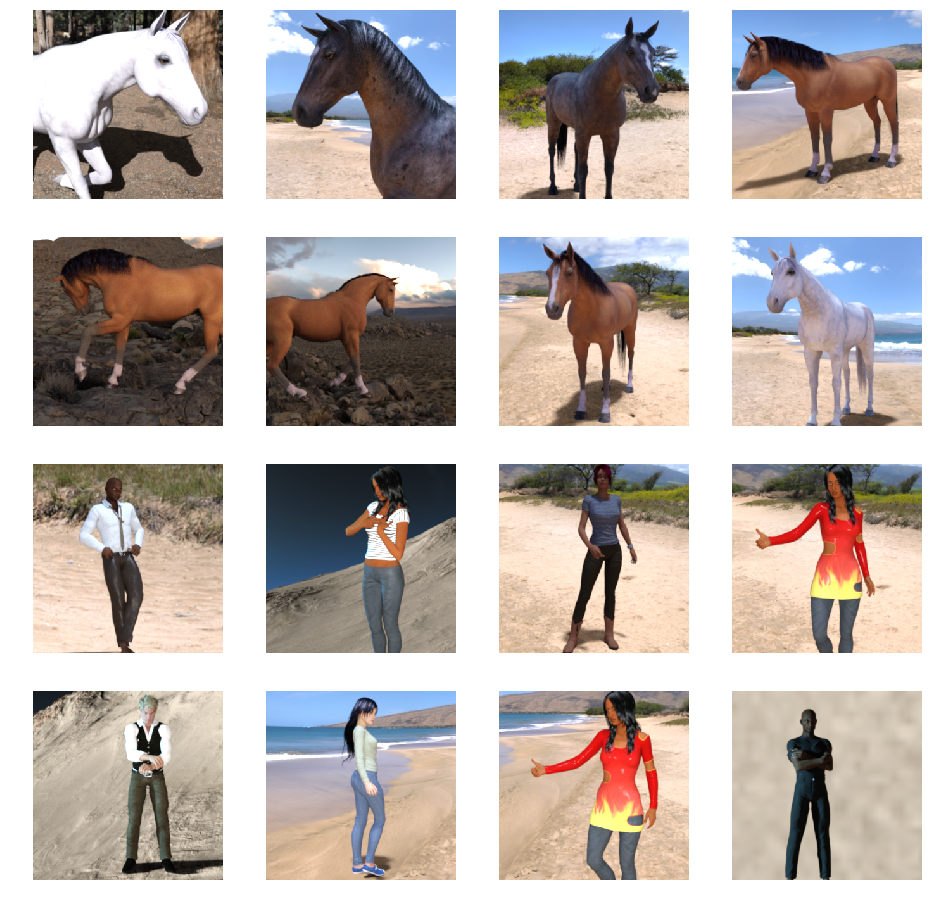

In [6]:
print('total training horse images:', len(train_horse_names))
print('total training human images:', len(train_human_names))
print('total validation horse images:', len(val_horse_names))
print('total validation horse images:', len(val_horse_names))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph. We'll output images in 4x4 configuration
nrows = 4
ncols = 4

# Index of iterating over the images
pic_index = 0

# setup matplotlib fig and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
  # Setup a subplot; subplot indices start from 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Dont show axes or gridlines
  
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show()
  
  

# Building the ConvNet

Steps -
1. Define a model
2. Add convolutional layers
3. Flatten the result
4. Feed it to the Neural Network
5. End the network with Sigmoid activatin ( Because this is a binary classification problem)

In [0]:
import tensorflow as tf

In [8]:
model = tf.keras.models.Sequential([
    # input size is the desired size of image 300x300 with 3 bytes of color
    # First convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second convolution
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third Convolution
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fourth Convolution
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fifth Convolution
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 layers hidden network
    tf.keras.layers.Dense(512, activation='relu'),
    # Binary classification. Hence single-output neuron with sigmoid activation
    tf.keras.layers.Dense(1, activation='sigmoid')
])

W0703 13:40:14.063730 139970577622912 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [10]:
# Train our model with binary_crossentropy loss as this is a binary classifcation problem
# We use 'rmsprop' optimizer compared to 'sgd' as rmsprop automates learning rate tuning.

from tensorflow.keras.optimizers import  RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001),
              metrics=['acc'])


W0703 13:40:14.466141 139970577622912 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**Data Preprocessing**

Data generators read image from source folders, convert them to float32 tensors and feed them to the network.
One generator for each training and validation images. Generators yield batches of images of size 300x300 and their labels (binary)

Data is normalized before sending to neural net. Hence the pixel value are normalized after dividing by 255. This rescaling can be done in keras using keras.preprocessing.image.ImageDataGenerator class using rescale parameter. This ImageDataGenerator class allows to instantiate generators of augmented image batches via .flow_from_directory .flow  

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory
        target_size=(300,300),
        batch_size=128,
        # Since we are using binary_crossentropy loss, we need binary labels
        class_mode='binary'
)

# Flow validation images
valid_generator = valid_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory
        target_size=(300,300),
        batch_size=128,
        # Since we are using binary_crossentropy loss, we need binary labels
        class_mode='binary'
)




Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


**Train the model**

Let's train for 15 epochs.

In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=valid_generator,
    validation_steps=8
)


Epoch 1/15
8/8 [==============================] - 115s 14s/step - loss: 0.7827 - acc: 0.5206 - val_loss: 0.6839 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 111s 14s/step - loss: 1.2189 - acc: 0.6463 - val_loss: 0.6745 - val_acc: 0.5000
Epoch 3/15
8/8 [==============================] - 110s 14s/step - loss: 0.6455 - acc: 0.6630 - val_loss: 0.6973 - val_acc: 0.5586
Epoch 4/15
8/8 [==============================] - 110s 14s/step - loss: 0.4910 - acc: 0.7987 - val_loss: 0.7059 - val_acc: 0.7188
Epoch 5/15
8/8 [==============================] - 120s 15s/step - loss: 0.2231 - acc: 0.9277 - val_loss: 3.9725 - val_acc: 0.6133
Epoch 6/15
8/8 [==============================] - 110s 14s/step - loss: 0.2228 - acc: 0.9188 - val_loss: 1.1835 - val_acc: 0.8125
Epoch 7/15
8/8 [==============================] - 110s 14s/step - loss: 0.1246 - acc: 0.9499 - val_loss: 0.9653 - val_acc: 0.8672
Epoch 8/15
8/8 [==============================] - 111s 14s/step - loss: 0.2070 - acc: 0.92

**Running the model**
Running a prediction using the model. 

Choose 1 or more files from local pc, upload them, run prediction model on them and classify them

In [15]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  
  # prediction images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))  # Change this value if we want to compress images
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + 'is a human')
  else:
    print(fn + 'is a horse')


Saving ag1.jpg to ag1.jpg
[1.]
ag1.jpgis a human
